# SNiFi: Random Forest Model in Binary Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from collections import Counter
import joblib

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

RANDOM_STATE = 42

ML_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))
DATASET_DIRECTORY = os.path.join(ML_DIR, 'data', 'production', 'csv')
MODEL_PATH = os.path.join(ML_DIR, 'models', 'RF_model_v1.0.0.pkl')

X_columns = [
    'flow_duration', 'Header_Length', 'Protocol Type', 'Duration',
    'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
    'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
    'ece_flag_number', 'cwr_flag_number', 'ack_count',
    'syn_count', 'fin_count', 'urg_count', 'rst_count', 
    'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP',
    'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min',
    'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue',
    'Radius', 'Covariance', 'Variance', 'Weight'
]
y_column = 'label'

df_sets = [k for k in os.listdir(DATASET_DIRECTORY) if k.endswith('.csv')]
df_sets.sort()
training_sets = df_sets[:int(len(df_sets) * .8)]
test_sets = df_sets[int(len(df_sets) * .8):]

dict_2classes = {
    'DDoS-RSTFINFlood': 'Attack',
    'DDoS-PSHACK_Flood': 'Attack',
    'DDoS-SYN_Flood': 'Attack',
    'DDoS-UDP_Flood': 'Attack',
    'DDoS-TCP_Flood': 'Attack',
    'DDoS-ICMP_Flood': 'Attack',
    'DDoS-SynonymousIP_Flood': 'Attack',
    'DDoS-ACK_Fragmentation': 'Attack',
    'DDoS-UDP_Fragmentation': 'Attack',
    'DDoS-ICMP_Fragmentation': 'Attack',
    'DDoS-SlowLoris': 'Attack',
    'DDoS-HTTP_Flood': 'Attack',
    'DoS-UDP_Flood': 'Attack',
    'DoS-SYN_Flood': 'Attack',
    'DoS-TCP_Flood': 'Attack',
    'DoS-HTTP_Flood': 'Attack',
    'Mirai-greeth_flood': 'Attack',
    'Mirai-greip_flood': 'Attack',
    'Mirai-udpplain': 'Attack',
    'Recon-PingSweep': 'Attack',
    'Recon-OSScan': 'Attack',
    'Recon-PortScan': 'Attack',
    'VulnerabilityScan': 'Attack',
    'Recon-HostDiscovery': 'Attack',
    'DNS_Spoofing': 'Attack',
    'MITM-ArpSpoofing': 'Attack',
    'BenignTraffic': 'Benign',
    'BrowserHijacking': 'Attack',
    'Backdoor_Malware': 'Attack',
    'XSS': 'Attack',
    'Uploading_Attack': 'Attack',
    'SqlInjection': 'Attack',
    'CommandInjection': 'Attack',
    'DictionaryBruteForce': 'Attack'
}

scaler = StandardScaler()
for train_set in tqdm(training_sets):
    file_path = os.path.join(DATASET_DIRECTORY, train_set)
    scaler.fit(pd.read_csv(file_path)[X_columns])

forest = RandomForestClassifier(n_jobs=-1, random_state=RANDOM_STATE)

for train_set in tqdm(training_sets):
    file_path = os.path.join(DATASET_DIRECTORY, train_set)
    d = pd.read_csv(file_path)  
    d[X_columns] = scaler.transform(d[X_columns])
    d[y_column] = [dict_2classes[k] for k in d[y_column]]
    forest.fit(d[X_columns], d[y_column])

joblib.dump(forest, MODEL_PATH)

y_test = []
y_pred = []
y_proba = []

for test_set in tqdm(test_sets):
    file_path = os.path.join(DATASET_DIRECTORY, train_set)
    d_test = pd.read_csv(DATASET_DIRECTORY + test_set)
    d_test[X_columns] = scaler.transform(d_test[X_columns])
    d_test[y_column] = [dict_2classes[k] for k in d_test[y_column]]
    y_test += list(d_test[y_column].values)
    y_pred += list(forest.predict(d_test[X_columns]))
    y_proba += list(forest.predict_proba(d_test[X_columns]))

100%|██████████| 34/34 [00:52<00:00,  1.55s/it]


   Attack  Benign predicted  actual
0    1.00    0.00    Attack  Attack
1    1.00    0.00    Attack  Attack
2    0.75    0.25    Attack  Attack
3    1.00    0.00    Attack  Attack
4    1.00    0.00    Attack  Attack
   Attack  Benign predicted  actual  confidence
0    1.00    0.00    Attack  Attack        1.00
1    1.00    0.00    Attack  Attack        1.00
2    0.75    0.25    Attack  Attack        0.75
3    1.00    0.00    Attack  Attack        1.00
4    1.00    0.00    Attack  Attack        1.00
  predicted  actual  confidence
0    Attack  Attack        1.00
1    Attack  Attack        1.00
2    Attack  Attack        0.75
3    Attack  Attack        1.00
4    Attack  Attack        1.00


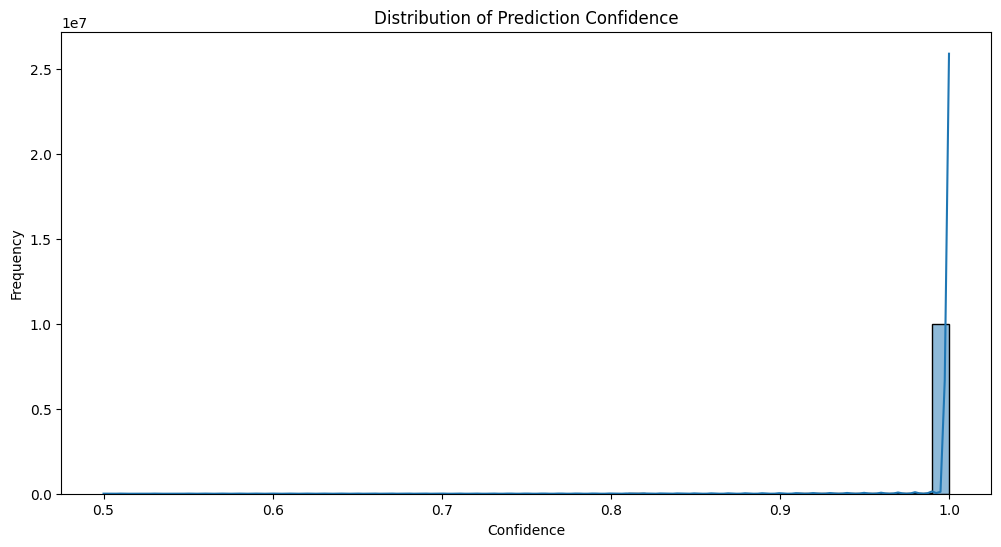

   Attack  Benign predicted  actual  confidence
0    1.00    0.00    Attack  Attack        1.00
1    1.00    0.00    Attack  Attack        1.00
2    0.75    0.25    Attack  Attack        0.75
3    1.00    0.00    Attack  Attack        1.00
4    1.00    0.00    Attack  Attack        1.00
##### Random Forest (2 classes) #####
accuracy_score:  0.9968324477732987
recall_score:  0.9645127044345947
precision_score:  0.9667313162565065
f1_score:  0.9656192284673764

Class Imbalance:
Attack: 10096839
Benign: 243322


In [3]:
proba_df = pd.DataFrame(y_proba, columns=forest.classes_)
proba_df['predicted'] = y_pred
proba_df['actual'] = y_test

print(proba_df.head())

proba_df['confidence'] = proba_df[['Attack', 'Benign']].max(axis=1)
print(proba_df.head())

print(proba_df[['predicted', 'actual', 'confidence']].head())

plt.figure(figsize=(12, 6))
sns.histplot(proba_df['confidence'], bins=50, kde=True)
plt.title('Distribution of Prediction Confidence')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.show()

print(proba_df.head())

print('##### Random Forest (2 classes) #####')
print('accuracy_score: ', accuracy_score(y_pred, y_test))
print('recall_score: ', recall_score(y_pred, y_test, average='macro'))
print('precision_score: ', precision_score(y_pred, y_test, average='macro'))
print('f1_score: ', f1_score(y_pred, y_test, average='macro'))

class_counts = Counter(y_test)
print("\nClass Imbalance:")
for label, count in class_counts.items():
    print(f"{label}: {count}")

In [4]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)
print("\n\n")

Confusion Matrix:
 [[10079867    16972]
 [   15781   227541]]





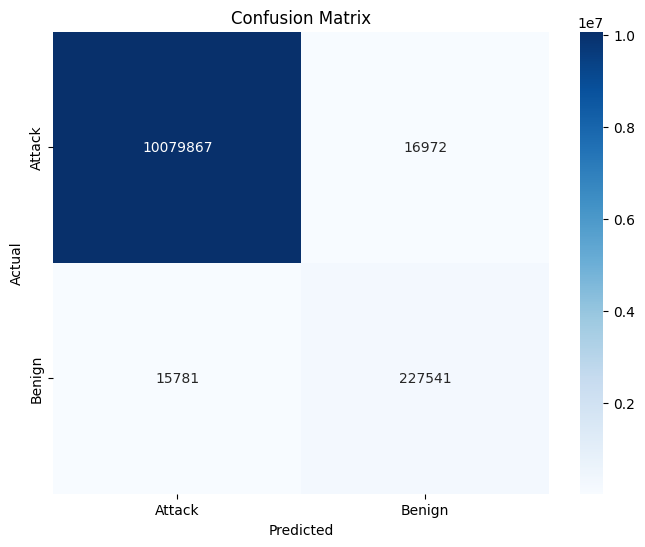

In [4]:
labels = ['Attack', 'Benign']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Overall Performance of Random Forest Model (Metric: *accuracy*)
* The model rarely makes mistakes.
* In **99.68%** of cases, it correctly determines the type of traffic (**attack** or **normal traffic**).

### How Well the Model Detects Attacks (Metric: *Recall*)
* The model is highly capable of identifying attack attempts, with a recall of over **96%**.

### How Well the Model Avoids False Alarms (Metric: *Precision*)
* The model performs excellently in avoiding false alarms, with a precision of over **96%**.

### Balance Between Detection and Avoiding False Alarms (Metric: *F1 Score*)
* The **F1 score**, which helps understand how well the model balances detecting attacks and avoiding false alarms, is over **96%**.
* This high F1 score indicates a strong balance between these two aspects: the model is equally good at detecting attacks and avoiding false alarms.

### Confusion Matrix Analysis
The confusion matrix shows how often the model makes errors or is accurate in its predictions. For this model:
* **Correctly** identified **10 079 867** attacks as threats <-- **True Positives (TP)**.
* **Incorrectly** identified **15 781** benign activities as attacks (false alarms) <-- **False Positives (FP)**.
* **Incorrectly** classified **16 972** attacks as safe activities (these are misses) <-- **False Negatives (FN)**.
* **Correctly** recognized **227 541** benign activities as safe activities <-- **True Negatives (TN)**.

In [6]:
proba_df.head(200)

,Attack,Benign,predicted,actual,confidence
0,1.00,0.00,Attack,Attack,1.00
1,1.00,0.00,Attack,Attack,1.00
2,0.75,0.25,Attack,Attack,0.75
3,1.00,0.00,Attack,Attack,1.00
4,1.00,0.00,Attack,Attack,1.00
...,...,...,...,...,...
195,1.00,0.00,Attack,Attack,1.00
196,1.00,0.00,Attack,Attack,1.00
197,1.00,0.00,Attack,Attack,1.00
198,1.00,0.00,Attack,Attack,1.00
